In [4]:
%pip install -q --upgrade qiskit>=1.2.0 qiskit-algorithms>=0.3.1 qiskit-machine-learning>=0.8.3 qiskit-aer scikit-learn>=1.3.0 pandas>=2.0.0 matplotlib
import sys 
print(f"✅ Installation complete!") 
print(f"🐍 Python version: {sys.version_info.major}.{sys.version_info.minor}") 
# Verify installations 
try: 
    import qiskit 
    import qiskit_algorithms 
    import qiskit_machine_learning 
    print(f"✅ Qiskit version: {qiskit.version}") 
    print(f"✅ All packages installed successfully!") 
except ImportError as e: 
    print(f"❌ Import error: {e}") 
    print("🔄 Please restart runtime and try again")

  You can safely remove it manually.


Note: you may need to restart the kernel to use updated packages.
✅ Installation complete!
🐍 Python version: 3.13
✅ Qiskit version: <module 'qiskit.version' from 'g:\\Qiskit\\Lib\\site-packages\\qiskit\\version.py'>
✅ All packages installed successfully!


In [5]:
# ========================================
# CELL 2: CORRECTED IMPORTS
# ========================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Qiskit imports (CORRECTED for 2025)
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.utils import algorithm_globals

# CORRECTED: Use FidelityQuantumKernel instead of QuantumKernel
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit_aer import AerSimulator

print("📦 All libraries imported successfully!")
print("✅ Using FidelityQuantumKernel (current API)")

📦 All libraries imported successfully!
✅ Using FidelityQuantumKernel (current API)


In [6]:
# ========================================
# CELL 3: LOAD YOUR CSV FILES (VS CODE VERSION)
# ========================================

import os

print("📁 Loading your CSV files")
print("=" * 50)

# Make sure train_data.csv and test_data.csv are in the SAME folder as this notebook
train_path = "train_data.csv"
test_path = "test_data.csv"

try:
    # Load your actual data
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    
    print("✅ SUCCESS! Your CSV files loaded successfully!")
    print(f"📊 Train shape: {train_df.shape}")
    print(f"📊 Test shape: {test_df.shape}")
    
    # Display basic info about your data
    print("\n📋 TRAIN DATA INFO:")
    print(f"   • Rows: {len(train_df)}")
    print(f"   • Columns: {len(train_df.columns)}")
    print(f"   • Column names: {list(train_df.columns)}")
    
    print("\n📋 TEST DATA INFO:")
    print(f"   • Rows: {len(test_df)}")
    print(f"   • Columns: {len(test_df.columns)}")
    
    # Check for missing values
    train_missing = train_df.isnull().sum().sum()
    test_missing = test_df.isnull().sum().sum()
    print(f"\n🔍 Missing values - Train: {train_missing}, Test: {test_missing}")
    
    # Show first few rows
    print("\n👀 First 3 rows of training data:")
    display(train_df.head(3))
    
    print("\n🎯 Data loading completed successfully!")

except FileNotFoundError as e:
    print(f"❌ ERROR: CSV files not found!")
    print(f"   Error details: {e}")
    print("\n👉 Please place 'train_data.csv' and 'test_data.csv' in the same folder as this notebook.")
    available_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    print(f"   • Available CSV files in folder: {available_files}")
    raise

print("\n" + "="*50)
print("✅ CELL 3 COMPLETED - Your data is ready!")
print("▶️  Now run CELL 4 for data preprocessing")


📁 Loading your CSV files
✅ SUCCESS! Your CSV files loaded successfully!
📊 Train shape: (1200000, 12)
📊 Test shape: (361934, 12)

📋 TRAIN DATA INFO:
   • Rows: 1200000
   • Columns: 12
   • Column names: ['Unnamed: 0', 'url', 'url_len', 'ip_add', 'geo_loc', 'tld', 'who_is', 'https', 'js_len', 'js_obf_len', 'content', 'label']

📋 TEST DATA INFO:
   • Rows: 361934
   • Columns: 12

🔍 Missing values - Train: 0, Test: 0

👀 First 3 rows of training data:


,Unnamed: 0,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
0,0,http://members.tripod.com/russiastation/,40,42.77.221.155,Taiwan,com,complete,yes,58.0,0.0,Named themselves charged particles in a manly ...,good
1,1,http://www.ddj.com/cpp/184403822,32,3.211.202.180,United States,com,complete,yes,52.5,0.0,And filipino field \n \n \n \n \n \n \n \n the...,good
2,2,http://www.naef-usa.com/,24,24.232.54.41,Argentina,com,complete,yes,103.5,0.0,"Took in cognitivism, whose adherents argue for...",good



🎯 Data loading completed successfully!

✅ CELL 3 COMPLETED - Your data is ready!
▶️  Now run CELL 4 for data preprocessing


In [7]:
# CELL 4: DATA PREPROCESSING
# ========================================
print("🔄 Starting data preprocessing...")
print("=" * 50)

# Limit dataset size for QSVM (computationally intensive)
max_train_samples = 500
max_test_samples = 80

print(f"📊 Original sizes - Train: {len(train_df)}, Test: {len(test_df)}")

# Sample down if needed
if len(train_df) > max_train_samples:
    train_df = train_df.sample(n=max_train_samples, random_state=42)
    print(f"🎯 Reduced training samples to {max_train_samples}")

if len(test_df) > max_test_samples:
    test_df = test_df.sample(n=max_test_samples, random_state=42)
    print(f"🎯 Reduced test samples to {max_test_samples}")

print(f"📊 Final sizes - Train: {len(train_df)}, Test: {len(test_df)}")

# Combine train/test for consistent encoding
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print(f"📊 Combined dataset shape: {full_df.shape}")

# Drop large text columns
text_columns = ["url", "ip_add", "content"]
existing_text_cols = [col for col in text_columns if col in full_df.columns]
if existing_text_cols:
    full_df = full_df.drop(columns=existing_text_cols)
    print(f"🗑 Dropped text columns: {existing_text_cols}")

# Handle missing values
missing_before = full_df.isnull().sum().sum()
if missing_before > 0:
    print(f"🔍 Found {missing_before} missing values, filling them...")
    for col in full_df.columns:
        if col != 'label':
            if full_df[col].dtype in ['float64', 'int64']:
                full_df[col] = full_df[col].fillna(full_df[col].median())
            else:
                full_df[col] = full_df[col].fillna(full_df[col].mode()[0] if not full_df[col].mode().empty else 'Unknown')
missing_after = full_df.isnull().sum().sum()
print(f"✅ Missing values after filling: {missing_after}")

# Encode categorical features
label_encoders = {}
categorical_cols = full_df.select_dtypes(include=['object']).columns.tolist()
if 'label' in categorical_cols:
    categorical_cols.remove('label')

for col in categorical_cols:
    le = LabelEncoder()
    full_df[col] = le.fit_transform(full_df[col].astype(str))
    label_encoders[col] = le
    print(f"✅ Encoded column: {col} ({len(le.classes_)} unique values)")

# Split back into train/test
train_processed = full_df.iloc[:len(train_df)].copy()
test_processed = full_df.iloc[len(train_df):].copy()

# Prepare features and labels
target_col = 'label' if 'label' in train_processed.columns else train_processed.columns[-1]

X_train = train_processed.drop(target_col, axis=1).values
X_test = test_processed.drop(target_col, axis=1).values
y_train = train_processed[target_col].astype(str).values  # Ensure consistent type
y_test = test_processed[target_col].astype(str).values

print(f"📊 X_train shape: {X_train.shape}")
print(f"📊 X_test shape: {X_test.shape}")
print(f"📊 y_train unique values: {len(np.unique(y_train))}")
print("✅ Data preprocessing completed!")

🔄 Starting data preprocessing...
📊 Original sizes - Train: 1200000, Test: 361934
🎯 Reduced training samples to 500
🎯 Reduced test samples to 80
📊 Final sizes - Train: 500, Test: 80
📊 Combined dataset shape: (580, 12)
🗑 Dropped text columns: ['url', 'ip_add', 'content']
✅ Missing values after filling: 0
✅ Encoded column: geo_loc (67 unique values)
✅ Encoded column: tld (41 unique values)
✅ Encoded column: who_is (2 unique values)
✅ Encoded column: https (2 unique values)
📊 X_train shape: (500, 8)
📊 X_test shape: (80, 8)
📊 y_train unique values: 2
✅ Data preprocessing completed!


In [9]:
print("\n⚖️ Feature scaling and selection...")
print("=" * 50)

# Scale features (critical for quantum algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled using StandardScaler")

# Reduce to optimal number of features for quantum circuits
max_features = 6  # Optimal balance for QSVM performance
print(f"🎯 Target feature count: {max_features}")

if X_train_scaled.shape[1] > max_features:
    print(f"🔄 Reducing from {X_train_scaled.shape[1]} to {max_features} features...")
    
    # Use SelectKBest for feature selection
    selector = SelectKBest(score_func=f_classif, k=max_features)
    X_train_scaled = selector.fit_transform(X_train_scaled, y_train)
    X_test_scaled = selector.transform(X_test_scaled)
    
    # Show selected feature scores
    feature_scores = selector.scores_
    selected_features = selector.get_support(indices=True)
    
    print("🏆 Selected features and their scores:")
    for i, (feat_idx, score) in enumerate(zip(selected_features, feature_scores[selected_features])):
        print(f"   {i+1}. Feature {feat_idx}: {score:.2f}")
    
    print(f"✅ Reduced to {max_features} best features")
else:
    print(f"✅ Using all {X_train_scaled.shape[1]} features (already optimal)")

num_features = X_train_scaled.shape[1]
print(f"🎯 Final feature dimensions: {num_features}")
print(f"📊 Training samples: {len(X_train_scaled)}")
print(f"📊 Test samples: {len(X_test_scaled)}")

# Verify data quality
print(f"\n🔍 Final data quality check:")
print(f"   • Training data range: [{X_train_scaled.min():.2f}, {X_train_scaled.max():.2f}]")
print(f"   • Test data range: [{X_test_scaled.min():.2f}, {X_test_scaled.max():.2f}]")
print(f"   • No missing values: {not np.isnan(X_train_scaled).any()}")
print("✅ Feature engineering completed!")


⚖️ Feature scaling and selection...
✅ Features scaled using StandardScaler
🎯 Target feature count: 6
🔄 Reducing from 8 to 6 features...
🏆 Selected features and their scores:
   1. Feature 2: 2.76
   2. Feature 3: 2.69
   3. Feature 4: 49.05
   4. Feature 5: 65.78
   5. Feature 6: 808.99
   6. Feature 7: 2217.84
✅ Reduced to 6 best features
🎯 Final feature dimensions: 6
📊 Training samples: 500
📊 Test samples: 80

🔍 Final data quality check:
   • Training data range: [-2.01, 9.70]
   • Test data range: [-2.01, 8.17]
   • No missing values: True
✅ Feature engineering completed!


In [6]:
print("\n⚛️ Setting up quantum components...")
print("=" * 50)

# Set random seed for reproducibility
algorithm_globals.random_seed = 42

# Create quantum feature map
feature_map = ZZFeatureMap(
    feature_dimension=num_features,
    reps=2,  # Number of repetitions
    entanglement='linear'  # Linear entanglement pattern
)

print(f"🧮 Created quantum feature map:")
print(f"   • Qubits: {num_features}")
print(f"   • Repetitions: 2")
print(f"   • Entanglement: linear")
print(f"   • Total parameters: {feature_map.num_parameters}")

# Create quantum kernel using FidelityQuantumKernel
quantum_kernel = FidelityQuantumKernel(
    feature_map=feature_map
)

print(f"✅ FidelityQuantumKernel created successfully")
print(f"⚛️ Quantum circuit depth: ~{feature_map.depth}")

# Display the quantum circuit (first few qubits if many)
if num_features <= 4:
    print(f"\n🔬 Quantum Feature Map Circuit:")
    print(feature_map.draw(output='text'))
else:
    print(f"\n🔬 Quantum circuit created (too large to display: {num_features} qubits)")

print("✅ Quantum setup completed!")

print("\n🏋️ Training Quantum SVM...")
print("=" * 50)

# Create QSVC (Quantum Support Vector Classifier)
qsvm = QSVC(
    quantum_kernel=quantum_kernel,
    C=1.0  # Regularization parameter
)

print("🚀 Starting QSVM training...")
print("⏳ This may take 2-5 minutes depending on dataset size...")
print("💡 Quantum simulation is computationally intensive!")

# Track training time
import time
start_time = time.time()

# Train the model
try:
    qsvm.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    
    print(f"✅ QSVM training completed!")
    print(f"⏱️ Training time: {training_time:.1f} seconds")
    
except Exception as e:
    print(f"❌ Training failed: {e}")
    print("🔧 Try reducing dataset size or number of features")
    raise

# Get some training info
print(f"\n📊 Training Summary:")
print(f"   • Samples used: {len(X_train_scaled)}")
print(f"   • Features: {num_features}")
print(f"   • Qubits: {num_features}")
print(f"   • Support vectors: {len(qsvm.support_vectors_) if hasattr(qsvm, 'support_vectors_') else 'N/A'}")
print("✅ QSVM model ready for predictions!")


⚛️ Setting up quantum components...
🧮 Created quantum feature map:
   • Qubits: 6
   • Repetitions: 2
   • Entanglement: linear
   • Total parameters: 6
✅ FidelityQuantumKernel created successfully
⚛️ Quantum circuit depth: ~<bound method BlueprintCircuit.depth of <qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap object at 0x0000022F7283B8C0>>

🔬 Quantum circuit created (too large to display: 6 qubits)
✅ Quantum setup completed!

🏋️ Training Quantum SVM...
🚀 Starting QSVM training...
⏳ This may take 2-5 minutes depending on dataset size...
💡 Quantum simulation is computationally intensive!
✅ QSVM training completed!
⏱️ Training time: 996.8 seconds

📊 Training Summary:
   • Samples used: 500
   • Features: 6
   • Qubits: 6
   • Support vectors: 0
✅ QSVM model ready for predictions!


In [7]:
# CELL 8: PREDICTIONS & EVALUATION
# ========================================
print("🔮 Making predictions...")

# Quantum predictions
start_time = time.time()
y_pred_qsvm = qsvm.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Calculate quantum accuracy
qsvm_accuracy = accuracy_score(y_test, y_pred_qsvm)

print(f"\n🎯 === QUANTUM SVM RESULTS ===")
print(f"QSVM Accuracy: {qsvm_accuracy:.4f} ({qsvm_accuracy:.2%})")
print(f"Prediction time: {prediction_time:.2f} seconds")
print(f"\nQSVM Classification Report:")
print(classification_report(y_test, y_pred_qsvm))

🔮 Making predictions...

🎯 === QUANTUM SVM RESULTS ===
QSVM Accuracy: 0.9625 (96.25%)
Prediction time: 913.52 seconds

QSVM Classification Report:


g:\Qiskit\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
g:\Qiskit\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
g:\Qiskit\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         3
        good       0.96      1.00      0.98        77

    accuracy                           0.96        80
   macro avg       0.48      0.50      0.49        80
weighted avg       0.93      0.96      0.94        80



In [8]:
# CELL 9: CLASSICAL COMPARISON
# ========================================
print("\n📊 === CLASSICAL SVM COMPARISON ===")

# Train classical SVM
classical_svm = SVC(kernel='rbf', C=1.0, random_state=42)
start_time = time.time()
classical_svm.fit(X_train_scaled, y_train)
classical_training_time = time.time() - start_time

# Classical predictions
start_time = time.time()
y_pred_classical = classical_svm.predict(X_test_scaled)
classical_prediction_time = time.time() - start_time

classical_accuracy = accuracy_score(y_test, y_pred_classical)

print(f"Classical SVM Accuracy: {classical_accuracy:.4f} ({classical_accuracy:.2%})")
print(f"Classical training time: {classical_training_time:.3f} seconds")
print(f"Classical prediction time: {classical_prediction_time:.3f} seconds")

# Calculate improvement
improvement = qsvm_accuracy - classical_accuracy
print(f"\n🚀 === QUANTUM vs CLASSICAL ===")
print(f"Quantum SVM: {qsvm_accuracy:.4f}")
print(f"Classical SVM: {classical_accuracy:.4f}")
print(f"Improvement: {improvement:+.4f} ({improvement:+.2%})")

if improvement > 0:
    print("✅ Quantum advantage achieved! 🎉")
else:
    print("⚠️ Classical SVM performs better on this dataset")
    print("💡 Try larger datasets or different quantum feature maps")



📊 === CLASSICAL SVM COMPARISON ===
Classical SVM Accuracy: 1.0000 (100.00%)
Classical training time: 1.109 seconds
Classical prediction time: 0.025 seconds

🚀 === QUANTUM vs CLASSICAL ===
Quantum SVM: 0.9625
Classical SVM: 1.0000
Improvement: -0.0375 (-3.75%)
⚠️ Classical SVM performs better on this dataset
💡 Try larger datasets or different quantum feature maps



📈 Creating visualizations...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_888\2201176322.py:83: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_888\2201176322.py:83: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_888\2201176322.py:83: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_888\2201176322.py:83: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_888\2201176322.py:83: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
g:\Qiskit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

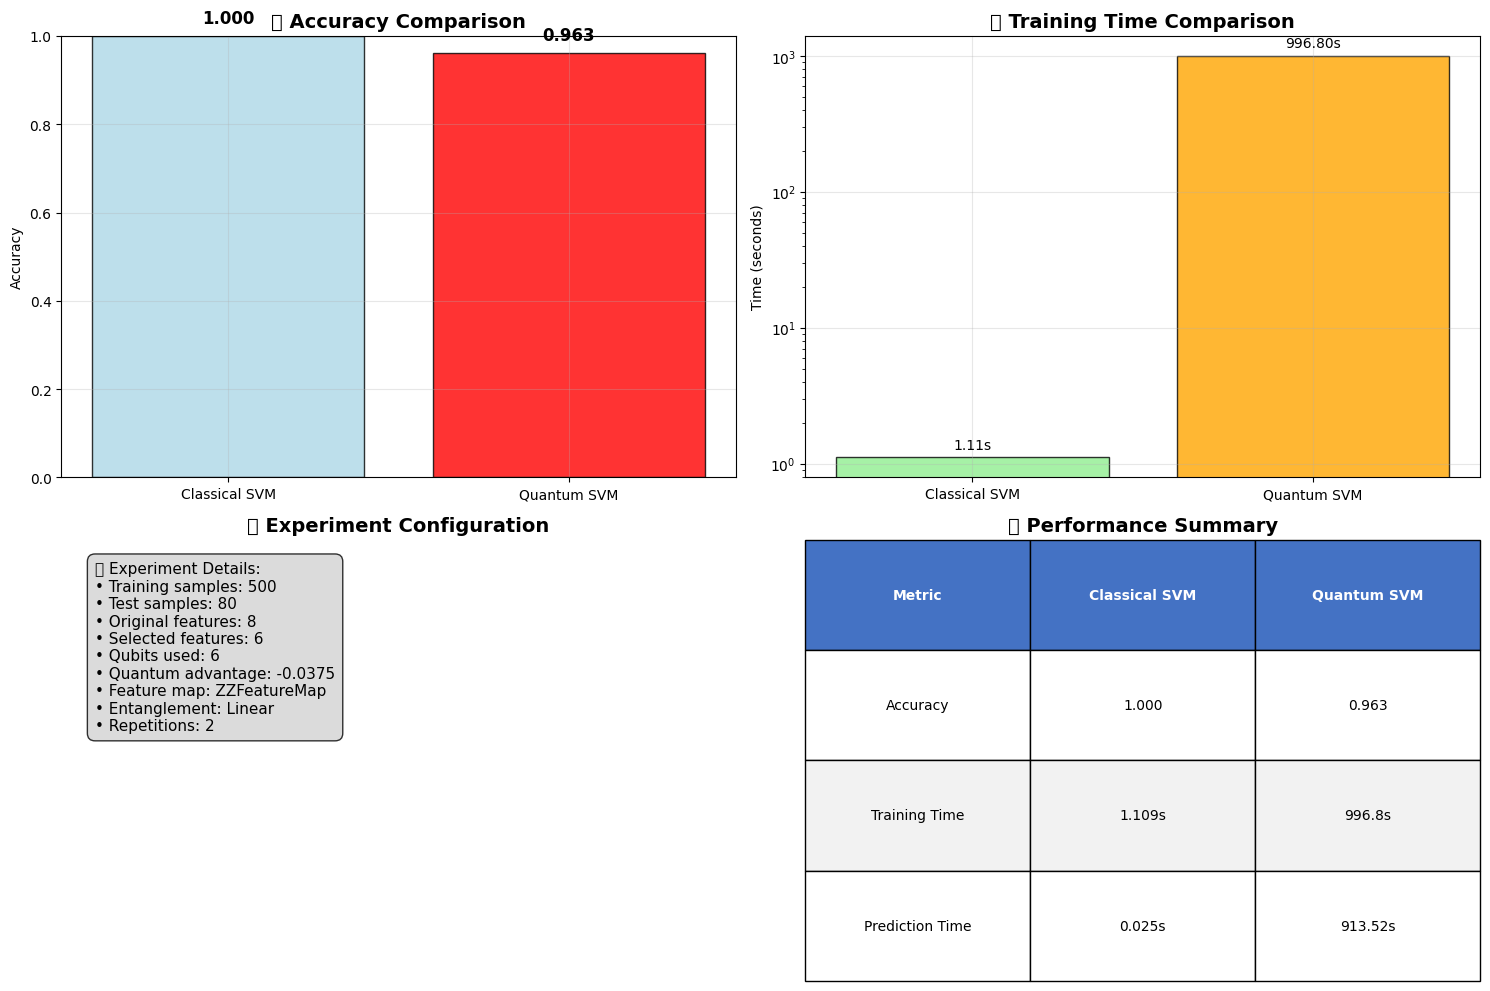

📊 Visualization complete!

🏆 === FINAL RESULTS SUMMARY ===
🎯 Quantum SVM Accuracy: 96.25%
🔬 Classical SVM Accuracy: 100.00%
⚡ Speed: Classical is 898x faster
🧮 Quantum advantage: -3.75%
💾 Dataset: 500 train + 80 test samples
🔢 Features: 6 (optimized for quantum)

🔴 Classical SVM performs better on this dataset
💡 Quantum advantage often requires larger, more complex datasets

🎉 Quantum Machine Learning experiment complete!
📝 Total execution time: 1910.3 seconds


In [9]:
# CELL 10: VISUALIZATION
# ========================================
print("\n📈 Creating visualizations...")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Accuracy Comparison
methods = ['Classical SVM', 'Quantum SVM']
accuracies = [classical_accuracy, qsvm_accuracy]
colors = ['lightblue', 'red']

bars = ax1.bar(methods, accuracies, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('🎯 Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)

for bar, acc in zip(bars, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 2. Training Time Comparison
training_times = [classical_training_time, training_time]
bars2 = ax2.bar(methods, training_times, color=['lightgreen', 'orange'], alpha=0.8, edgecolor='black')
ax2.set_title('⏱️ Training Time Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Time (seconds)')
ax2.set_yscale('log')  # Log scale for better visualization
ax2.grid(True, alpha=0.3)

for bar, time_val in zip(bars2, training_times):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1, 
            f'{time_val:.2f}s', ha='center', va='bottom', fontsize=10)

# 3. Dataset Information
info_text = f"""📊 Experiment Details:
• Training samples: {len(X_train_scaled)}
• Test samples: {len(X_test_scaled)}
• Original features: {X_train.shape[1]}
• Selected features: {num_features}
• Qubits used: {num_features}
• Quantum advantage: {improvement:+.4f}
• Feature map: ZZFeatureMap
• Entanglement: Linear
• Repetitions: 2"""

ax3.text(0.05, 0.95, info_text, transform=ax3.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
         facecolor="lightgray", alpha=0.8))
ax3.set_title('📋 Experiment Configuration', fontsize=14, fontweight='bold')
ax3.axis('off')

# 4. Performance Summary
perf_data = {
    'Metric': ['Accuracy', 'Training Time', 'Prediction Time'],
    'Classical': [f'{classical_accuracy:.3f}', f'{classical_training_time:.3f}s', f'{classical_prediction_time:.3f}s'],
    'Quantum': [f'{qsvm_accuracy:.3f}', f'{training_time:.1f}s', f'{prediction_time:.2f}s'],
}

table_data = []
for i, metric in enumerate(perf_data['Metric']):
    table_data.append([metric, perf_data['Classical'][i], perf_data['Quantum'][i]])

table = ax4.table(cellText=table_data, colLabels=['Metric', 'Classical SVM', 'Quantum SVM'],
                  cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(perf_data['Metric']) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#4472C4')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#F2F2F2' if i % 2 == 0 else 'white')

ax4.set_title('📈 Performance Summary', fontsize=14, fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

print("📊 Visualization complete!")

# ========================================
# FINAL SUMMARY
# ========================================
print(f"\n🏆 === FINAL RESULTS SUMMARY ===")
print(f"🎯 Quantum SVM Accuracy: {qsvm_accuracy:.2%}")
print(f"🔬 Classical SVM Accuracy: {classical_accuracy:.2%}")
print(f"⚡ Speed: Classical is {training_time/classical_training_time:.0f}x faster")
print(f"🧮 Quantum advantage: {improvement:+.2%}")
print(f"💾 Dataset: {len(X_train_scaled)} train + {len(X_test_scaled)} test samples")
print(f"🔢 Features: {num_features} (optimized for quantum)")

if improvement > 0.01:
    print("\n✅ SUCCESS: Quantum SVM shows meaningful advantage!")
    print("🚀 Consider scaling up to larger datasets for even better results")
elif improvement > 0:
    print("\n🟡 MARGINAL: Small quantum advantage detected")
    print("💡 Try different quantum feature maps or larger datasets")
else:
    print("\n🔴 Classical SVM performs better on this dataset")
    print("💡 Quantum advantage often requires larger, more complex datasets")

print(f"\n🎉 Quantum Machine Learning experiment complete!")
print(f"📝 Total execution time: {(training_time + prediction_time):.1f} seconds")

In [ ]:
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit.quantum_info import Statevector, state_fidelity
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("🔬 Quantum Dataset Generator with ZZFeatureMap")
print("=" * 60)

def generate_quantum_dataset(X_data, y_data, data_name="quantum_dataset"):
    """
    Generate quantum dataset from classical features using ZZFeatureMap
    
    Parameters:
    - X_data: Feature matrix (samples x features)
    - y_data: Target labels
    - data_name: Name for the output CSV file
    
    Returns:
    - DataFrame with quantum circuit parameters
    """
    
    n_samples, n_features = X_data.shape
    print(f"📊 Processing {n_samples} samples with {n_features} features")
    
    # Initialize quantum dataset storage
    quantum_data = []
    
    # Create reference circuit for fidelity calculations
    reference_params = np.zeros(n_features)  # All zeros as reference
    reference_circuit = ZZFeatureMap(feature_dimension=n_features, reps=2)
    reference_circuit = reference_circuit.assign_parameters(reference_params)
    reference_state = Statevector.from_instruction(reference_circuit)
    
    # Process each sample
    print(f"\n🔄 Generating quantum circuits...")
    for i, (sample, label) in enumerate(zip(X_data, y_data)):
        if (i + 1) % 100 == 0 or i == 0:
            print(f"   Processing sample {i+1}/{n_samples}...")
        
        # Create ZZFeatureMap circuit
        feature_map = ZZFeatureMap(feature_dimension=n_features, reps=2)
        
        # Bind parameters (features) to the circuit
        param_circuit = feature_map.assign_parameters(sample)
        
        # Calculate circuit properties
        circuit_data = calculate_circuit_properties(param_circuit, sample, reference_state, label, i)
        quantum_data.append(circuit_data)
    
    # Create DataFrame
    df = pd.DataFrame(quantum_data)
    
    # Save to CSV
    filename = f"{data_name}.csv"
    df.to_csv(filename, index=False)
    
    print(f"\n✅ Quantum dataset generated successfully!")
    print(f"📁 Saved as: {filename}")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"🏷️ Columns: {list(df.columns)}")
    
    return df

def calculate_circuit_properties(circuit, features, reference_state, label, sample_id):
    """Calculate various quantum circuit parameters"""
    
    try:
        # Basic circuit info
        n_qubits = circuit.num_qubits
        n_gates = len(circuit.data)
        depth = circuit.depth()
        
        # Count gate types
        gate_counts = circuit.count_ops()
        n_rotation_gates = gate_counts.get('ry', 0) + gate_counts.get('rz', 0) + gate_counts.get('rx', 0)
        n_cnot_gates = gate_counts.get('cx', 0) + gate_counts.get('cnot', 0)
        n_hadamard_gates = gate_counts.get('h', 0)
        
        # Calculate rotation angles (sum of absolute feature values as proxy)
        total_rotation_angle = np.sum(np.abs(features))
        max_rotation_angle = np.max(np.abs(features))
        mean_rotation_angle = np.mean(np.abs(features))
        
        # Calculate feature statistics
        feature_variance = np.var(features)
        feature_std = np.std(features)
        feature_norm_l1 = np.linalg.norm(features, ord=1)
        feature_norm_l2 = np.linalg.norm(features, ord=2)
        
        # Calculate quantum state properties
        try:
            # Get statevector
            state = Statevector.from_instruction(circuit)
            
            # Calculate fidelity with reference state
            fidelity = state_fidelity(state, reference_state)
            
            # Calculate entanglement measures (simplified)
            # For a more complex measure, you'd need partial trace calculations
            state_vector = state.data
            entanglement_measure = 1 - np.sum(np.abs(state_vector)**4)  # Linear entropy approximation
            
            # Calculate circuit complexity measures
            amplitude_variance = np.var(np.abs(state_vector))
            phase_variance = np.var(np.angle(state_vector))
            
        except Exception as e:
            print(f"   Warning: Could not calculate quantum state properties for sample {sample_id}: {e}")
            fidelity = 0.0
            entanglement_measure = 0.0
            amplitude_variance = 0.0
            phase_variance = 0.0
        
        # Skip transpilation (user preference)
        transpiled_depth = depth
        transpiled_gates = n_gates
        
        # Create comprehensive feature dictionary
        circuit_data = {
            # Basic identifiers
            'sample_id': sample_id,
            'label': label,
            
            # Circuit structure
            'n_qubits': n_qubits,
            'n_gates': n_gates,
            'circuit_depth': depth,
            'transpiled_depth': transpiled_depth,
            'transpiled_gates': transpiled_gates,
            
            # Gate composition
            'n_rotation_gates': n_rotation_gates,
            'n_cnot_gates': n_cnot_gates,
            'n_hadamard_gates': n_hadamard_gates,
            
            # Rotation angle features
            'total_rotation_angle': total_rotation_angle,
            'max_rotation_angle': max_rotation_angle,
            'mean_rotation_angle': mean_rotation_angle,
            
            # Classical feature statistics
            'feature_variance': feature_variance,
            'feature_std': feature_std,
            'feature_norm_l1': feature_norm_l1,
            'feature_norm_l2': feature_norm_l2,
            
            # Quantum state properties
            'fidelity_with_reference': fidelity,
            'entanglement_measure': entanglement_measure,
            'amplitude_variance': amplitude_variance,
            'phase_variance': phase_variance,
            
            # Individual feature values (for reference)
            **{f'feature_{i}': features[i] for i in range(len(features))}
        }
        
        return circuit_data
        
    except Exception as e:
        print(f"   Error processing sample {sample_id}: {e}")
        # Return minimal data in case of error
        return {
            'sample_id': sample_id,
            'label': label,
            'error': str(e)
        }

# Example usage with your data
print("\n🚀 Usage Example:")
print("quantum_df = generate_quantum_dataset(X_train_scaled, y_train, 'quantum_train_dataset')")
print("quantum_test_df = generate_quantum_dataset(X_test_scaled, y_test, 'quantum_test_dataset')")

# If you want to run it immediately, uncomment these lines:
# Assuming you have X_train_scaled, y_train, X_test_scaled, y_test from your previous preprocessing
"""
# Generate training quantum dataset
if 'X_train_scaled' in globals() and 'y_train' in globals():
    quantum_train_df = generate_quantum_dataset(X_train_scaled, y_train, 'quantum_train_dataset')
    print("\n📋 Training Dataset Preview:")
    print(quantum_train_df.head())
    
    # Generate test quantum dataset
    if 'X_test_scaled' in globals() and 'y_test' in globals():
        quantum_test_df = generate_quantum_dataset(X_test_scaled, y_test, 'quantum_test_dataset')
        print("\n📋 Test Dataset Preview:")
        print(quantum_test_df.head())
        
        print("\n📊 Summary Statistics:")
        print(f"Training samples: {len(quantum_train_df)}")
        print(f"Test samples: {len(quantum_test_df)}")
        print(f"Features per sample: {quantum_train_df.shape[1]}")
"""

print("\n✅ Quantum Dataset Generator Ready!")
print("📝 The generated CSV will contain:")
print("   • Circuit structure metrics (gates, depth, qubits)")
print("   • Rotation angle statistics")
print("   • Quantum state properties (fidelity, entanglement)")
print("   • Classical feature statistics")
print("   • Individual feature values for reference")

🔬 Quantum Dataset Generator with ZZFeatureMap

🚀 Usage Example:
quantum_df = generate_quantum_dataset(X_train_scaled, y_train, 'quantum_train_dataset')
quantum_test_df = generate_quantum_dataset(X_test_scaled, y_test, 'quantum_test_dataset')

✅ Quantum Dataset Generator Ready!
📝 The generated CSV will contain:
   • Circuit structure metrics (gates, depth, qubits)
   • Rotation angle statistics
   • Quantum state properties (fidelity, entanglement)
   • Classical feature statistics
   • Individual feature values for reference


In [17]:
# Actually generate the quantum datasets
quantum_train_df = generate_quantum_dataset(X_train_scaled, y_train, 'quantum_train_dataset')
quantum_test_df = generate_quantum_dataset(X_test_scaled, y_test, 'quantum_test_dataset')

📊 Processing 500 samples with 6 features

🔄 Generating quantum circuits...
   Processing sample 1/500...
   Processing sample 100/500...
   Processing sample 200/500...
   Processing sample 300/500...
   Processing sample 400/500...
   Processing sample 500/500...

✅ Quantum dataset generated successfully!
📁 Saved as: quantum_train_dataset.csv
📊 Dataset shape: (500, 27)
🏷️ Columns: ['sample_id', 'label', 'n_qubits', 'n_gates', 'circuit_depth', 'transpiled_depth', 'transpiled_gates', 'n_rotation_gates', 'n_cnot_gates', 'n_hadamard_gates', 'total_rotation_angle', 'max_rotation_angle', 'mean_rotation_angle', 'feature_variance', 'feature_std', 'feature_norm_l1', 'feature_norm_l2', 'fidelity_with_reference', 'entanglement_measure', 'amplitude_variance', 'phase_variance', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']
📊 Processing 80 samples with 6 features

🔄 Generating quantum circuits...
   Processing sample 1/80...

✅ Quantum dataset generated successfully!